In [1]:
import cartopy
import matplotlib.pyplot as plt

import shapely.geometry as sgeom
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader

import geopandas as gpd
import geoplot as gplt
import geoplot.crs as gcrs
import matplotlib.pyplot as plt

import pandas as pd
import math

import matplotlib.colors as colors
import numpy as np

from shapely.geometry import Polygon
from shapely.geometry import shape

import folium

import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
import urllib
import json
import geojson
from shapely.geometry import Point

import pyproj
import shapely.wkt
import requests
import fiona

In [2]:
'''
ALTIJD:
Output Fields = *
Output Spatial Reference = 4326
Format = GeoJSON

Als je meer dan 2000 datapoints moet laden:
resultType = standard
'''
#URL'S:

#Outlines of camps 14, 15, 16
camp_outlines = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Rohingya_Refugee_Camps_Sites_Outline_May_18/FeatureServer/0/query?where=New_Camp_N+%3D+%27Camp+14%27+OR+New_Camp_N++%3D++%27Camp+15%27+OR+New_Camp_N++%3D+%27Camp+16%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
#Subsections of camps 14, 15, 16
ssc_all = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Updated_Majhee_Block_May_18/FeatureServer/0/query?where=SiteName+%3D+%27Camp+14%27+OR+SiteName+%3D++%27Camp+15%27+OR+SiteName+%3D+%27Camp+16%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
#WASH infrastrucutre of camps 14, 15, 16
wash = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Updated_WASH_infrastructure_Round_7/FeatureServer/0/query?where=Camp_name+%3D+%27Camp+14%27+OR+Camp_name+%3D++%27Camp+15%27+OR+Camp_name%3D+%27Camp+16%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=standard&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='

#Subsections Camp 14
ssc14 = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Updated_Majhee_Block_May_18/FeatureServer/0/query?where=SiteName+%3D+%27Camp+14%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=standard&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
#Subsections Camp 15
ssc15 = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Updated_Majhee_Block_May_18/FeatureServer/0/query?where=SiteName+%3D+%27Camp+15%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=standard&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='
#WASH Camp 15
wash15 = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Updated_WASH_infrastructure_Round_7/FeatureServer/0/query?where=Camp_name+%3D+%27Camp+15%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=standard&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='

#Subsections Camp 16
ssc16 = 'https://services5.arcgis.com/QYf5PkPqzJKVzrmF/arcgis/rest/services/Updated_Majhee_Block_May_18/FeatureServer/0/query?where=SiteName+%3D+%27Camp+16%27&objectIds=&time=&geometry=&geometryType=esriGeometryEnvelope&inSR=&spatialRel=esriSpatialRelIntersects&resultType=none&distance=0.0&units=esriSRUnit_Meter&returnGeodetic=false&outFields=*&returnGeometry=true&returnCentroid=false&multipatchOption=xyFootprint&maxAllowableOffset=&geometryPrecision=&outSR=4326&datumTransformation=&applyVCSProjection=false&returnIdsOnly=false&returnUniqueIdsOnly=false&returnCountOnly=false&returnExtentOnly=false&returnDistinctValues=false&orderByFields=&groupByFieldsForStatistics=&outStatistics=&having=&resultOffset=&resultRecordCount=&returnZ=false&returnM=false&returnExceededLimitFeatures=true&quantizationParameters=&sqlFormat=none&f=pgeojson&token='

9293


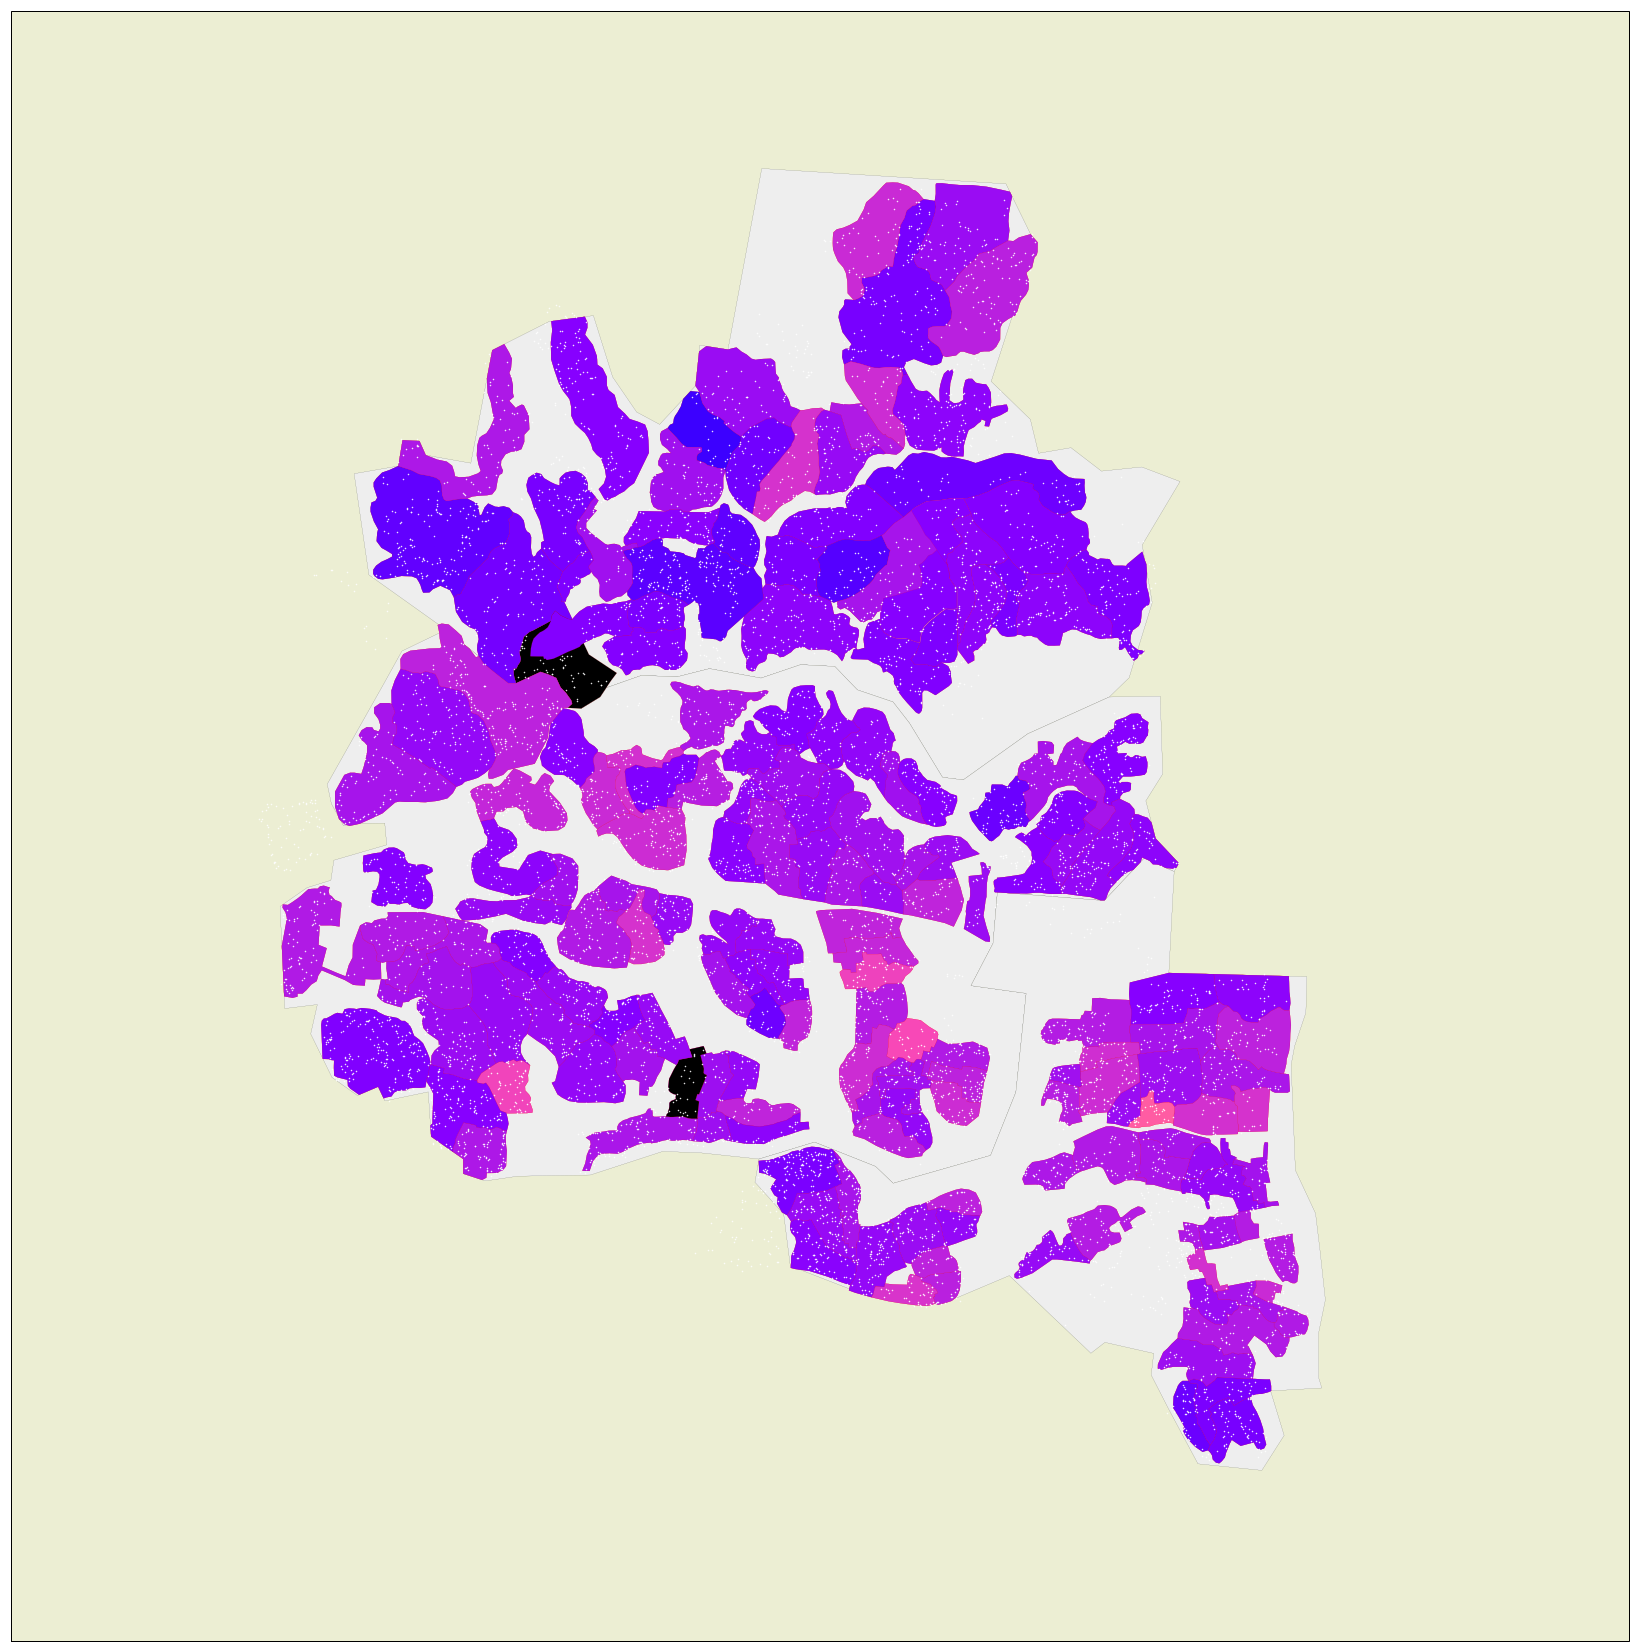

In [4]:

%matplotlib inline


#set the size of the figure
plt.figure(figsize=(30,30))

#plot the axes for a certain projection
ax = plt.axes(projection=ccrs.PlateCarree())



###get the Bangladeshi district data from the files###
districts_filename = 'shapefiles/BGD_bnda_adm2_2015'

for district in shpreader.Reader(districts_filename).geometries():

    ax.add_geometries([district], ccrs.PlateCarree(), facecolor='#eceed3', edgecolor='black', linewidth=0.1)


### crop the map ###
#top left corner: 
#21,1747 92,1323 Graden
#bottom right corner: 
#21,1491 92,1577 Graden
   
    
min_lon = 92.1323
max_lon = 92.1577
min_lat = 21.1491
max_lat = 21.1747
    
    
road_extent = (min_lon, max_lon, min_lat, max_lat)
ax.set_extent(road_extent) 


cmap = plt.get_cmap('gnuplot2')

outlines = requests.get(camp_outlines)
outlines_results = outlines.json()

for entry in outlines_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    ax.add_geometries([shapey], ccrs.PlateCarree(), facecolor='#eeeeee', edgecolor='black', linewidth=0.1)
  


ssc = requests.get(ssc_all)
ssc_results = ssc.json()


for entry in ssc_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    
    data = entry['properties']
    population = data['Total_Pop']
    hh = data['Total_HH']
    avg_pp_hh = 0
    if(hh != 0):
        avg_pp_hh = population/hh
        #print(avg_pp_hh)

    color = cmap(avg_pp_hh/10)

    
    ax.add_geometries([shapey], ccrs.PlateCarree(), facecolor=color, edgecolor='red', linewidth=0.1)
    
wash_infra = requests.get(wash)
wash_results = wash_infra.json()

no_of_wash = 0

for entry in wash_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    #print(shapey.geom_type)
    x,y = shapey.xy
    #ax2.add_geometries([shapey], ccrs.PlateCarree(), color='white', zorder=4)
    ax.plot(x,y, 'o', color='white', markersize=0.5)
    no_of_wash += 1
    
print(no_of_wash)
plt.show()


In [5]:
def wash_colors(type):
    colors = {'Unimproved water source' : '#ffffff',
     'Tapstand' : '#ffffff', 
     'Water Tank': '#ffffff', 
     'Pit or dump point': '#ffffff', 
     'Wash Room(s)': '#ffffff', 
     'Hand Pump - Tubewell': '#ffffff', 
     'Decommissioned Latrine': '#ffffff', 
     'Latrine(s)': '#00ff00'}
    return colors[type]
    

0.0 185.5


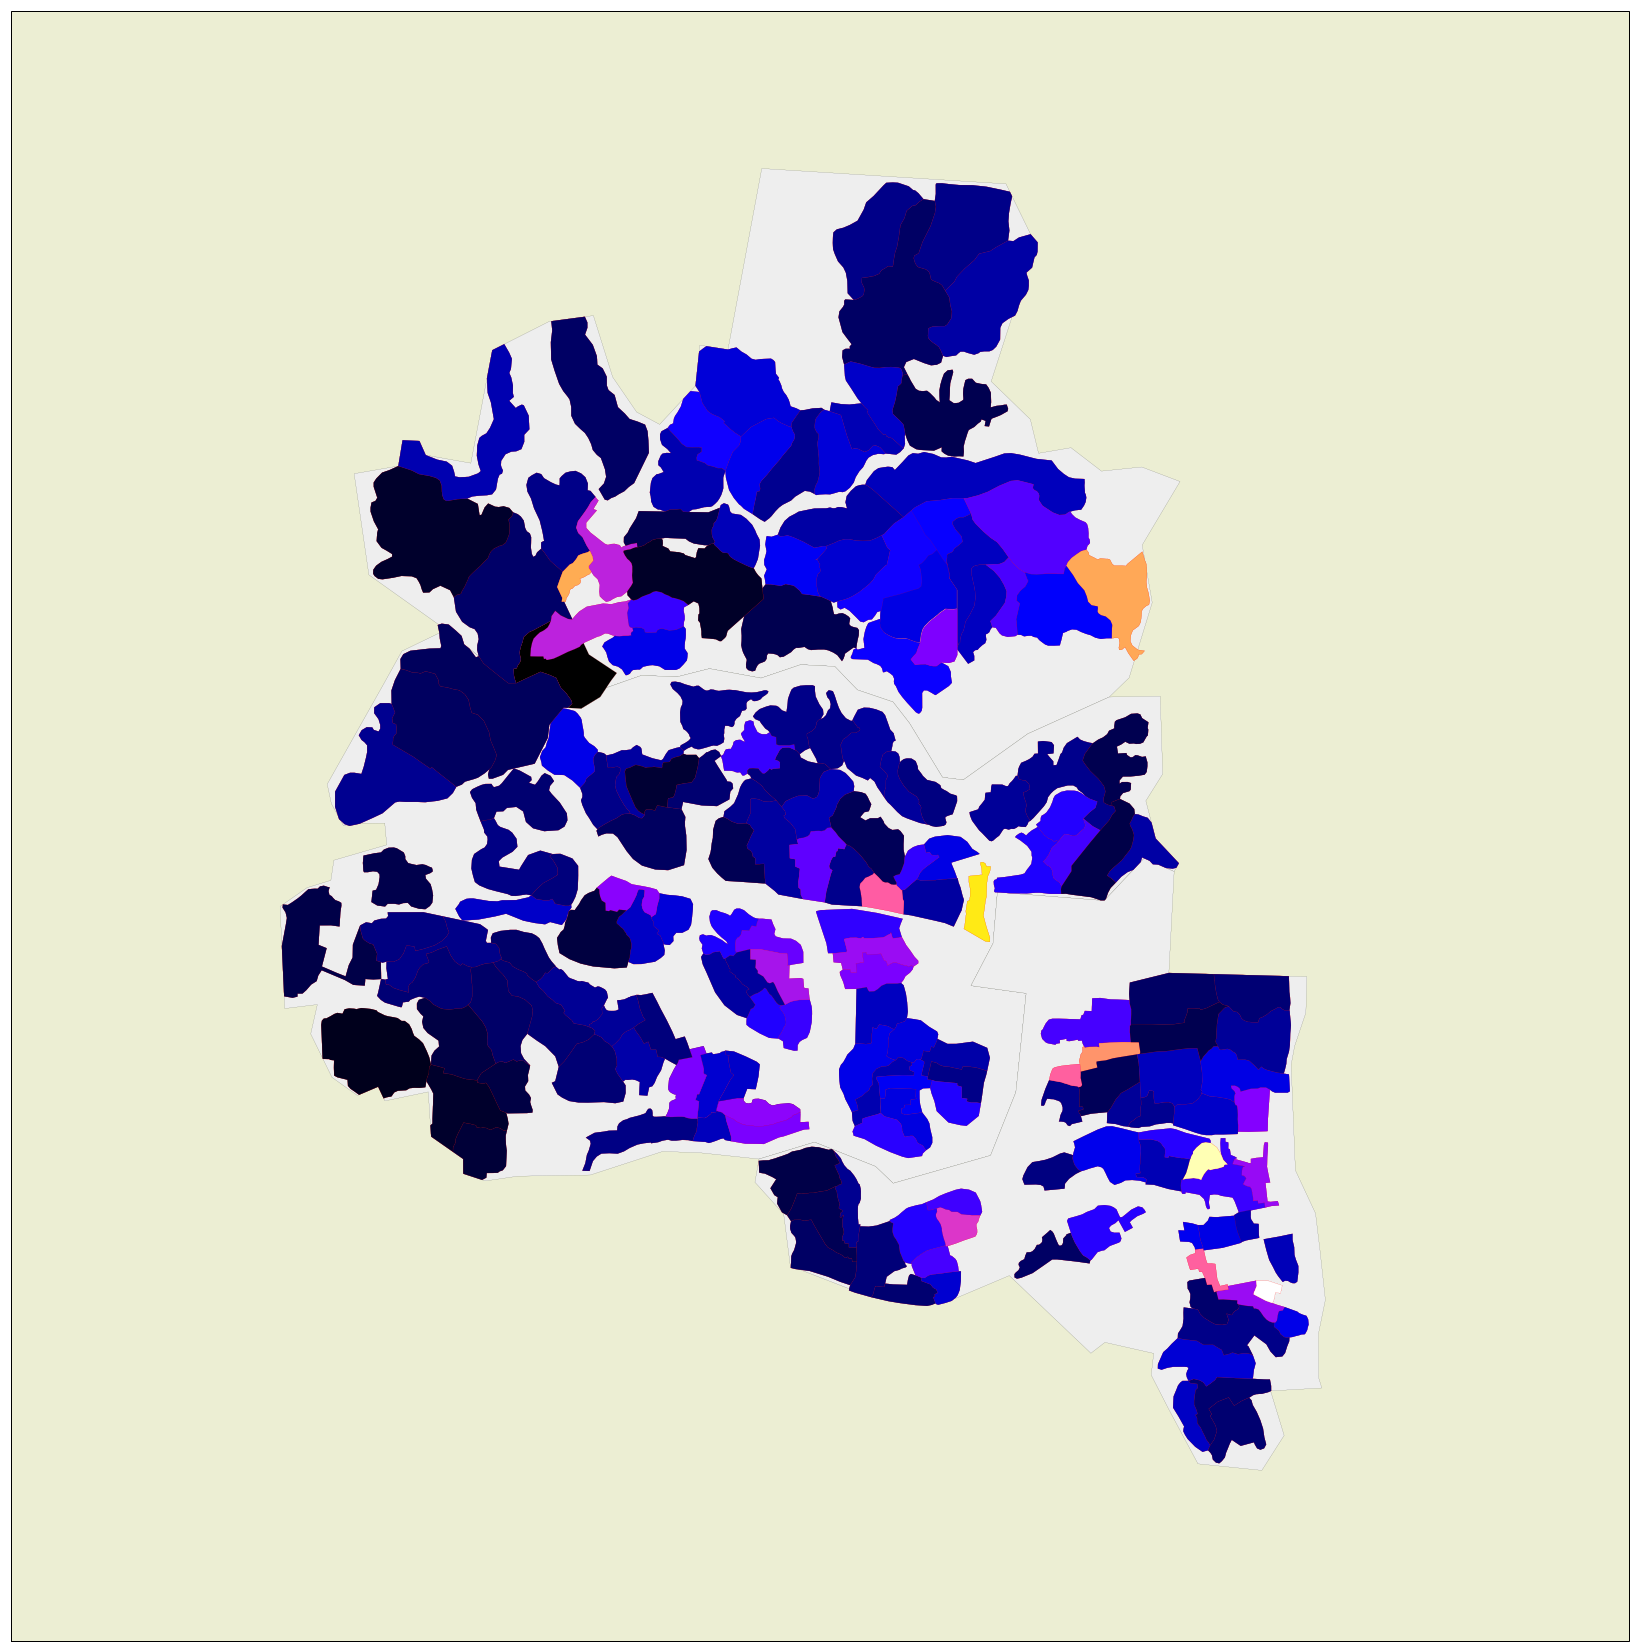

In [6]:


#set the size of the figure
plt.figure(figsize=(30,30))

#plot the axes for a certain projection
ax2 = plt.axes(projection=ccrs.PlateCarree())



###get the Bangladeshi district data from the files###
districts_filename = 'shapefiles/BGD_bnda_adm2_2015'

for district in shpreader.Reader(districts_filename).geometries():

    ax2.add_geometries([district], ccrs.PlateCarree(), facecolor='#eceed3', edgecolor='black', linewidth=0.1)


### crop the map ###
#top left corner: 
#21,1747 92,1323 Graden
#bottom right corner: 
#21,1491 92,1577 Graden
   
''' 
This is a zoomed in section
min_lon = 92.1383
max_lon = 92.1408
min_lat = 21.1570
max_lat = 21.1584
'''  

min_lon = 92.1323
max_lon = 92.1577
min_lat = 21.1491
max_lat = 21.1747

#crop the picture
road_extent = (min_lon, max_lon, min_lat, max_lat)
ax2.set_extent(road_extent) 

#retrieve the camp outlines
outlines = requests.get(camp_outlines)
outlines_results = outlines.json()

#retrieve the outlines of the subsections within a camp
ssc = requests.get(ssc_all)
ssc_results = ssc.json()

#retrieve all the wash infrastructure data
wash_infra = requests.get(wash)
wash_results = wash_infra.json()


for entry in outlines_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    ax2.add_geometries([shapey], ccrs.PlateCarree(), facecolor='#eeeeee', edgecolor='black', linewidth=0.1)


#Create a dict and fill it with all the id's of the subsections    
subsection_dict = {}    
    
for entry in ssc_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    data = entry['properties']
    block_id = data['Block_ID']
    
    subsection_dict[block_id] = 0
    
#The WASH data doesn't tell you which subsection a thing is in so here the number of latrines per subsection is determined
#and stored in the dict created above.
for entry in wash_results['features']:
    point = entry['geometry']
    shapey_point = shape(point)
    
    properties = entry['properties']
    type = properties['Str_sub_type']
    
    if type == 'Latrine(s)':
    
        for entry in ssc_results['features']:
            subsection = entry['geometry']
            shapey = shape(subsection)
            if shapey.contains(shapey_point):
                    data = entry['properties']
                    block_id = data['Block_ID']
                    subsection_dict[block_id] += 1
                    break
    
#print(subsection_dict)

#for the colormap we need to figure out the max no. of people per latrines
max_pp_latrines = 0

for entry in ssc_results['features']:
    
    data = entry['properties']
    population = data['Total_Pop']
    block_id = data['Block_ID']
    no_of_latrines = subsection_dict[block_id]
    
    if(no_of_latrines != 0):
        avg_pp_latrines = population/no_of_latrines
        if avg_pp_latrines > max_pp_latrines:
            max_pp_latrines = avg_pp_latrines

values = []            
            
for entry in ssc_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    
    data = entry['properties']
    population = data['Total_Pop']
    block_id = data['Block_ID']
    no_of_latrines = subsection_dict[block_id]
        
    if(no_of_latrines != 0):
        avg_pp_wash = population/no_of_latrines
        values.append(avg_pp_wash)
        
    color = cmap(avg_pp_wash/max_pp_latrines)

    
    ax2.add_geometries([shapey], ccrs.PlateCarree(), facecolor=color, edgecolor='red', linewidth=0.1)
    
    
print(min(values), max(values))

'''
for entry in wash_results['features']:
    #print(entry['geometry'])
    point = entry['geometry']
    properties = entry['properties']
    type = properties['Str_sub_type']
    
    color1 = wash_colors(type)

    shapey = shape(point)
    x,y = shapey.xy
    
    #ax2.add_geometries([shapey], ccrs.PlateCarree(), color='white', zorder=4)
    ax2.plot(x,y, 'o', color=color1, markersize=6)
  
'''


 
plt.show()

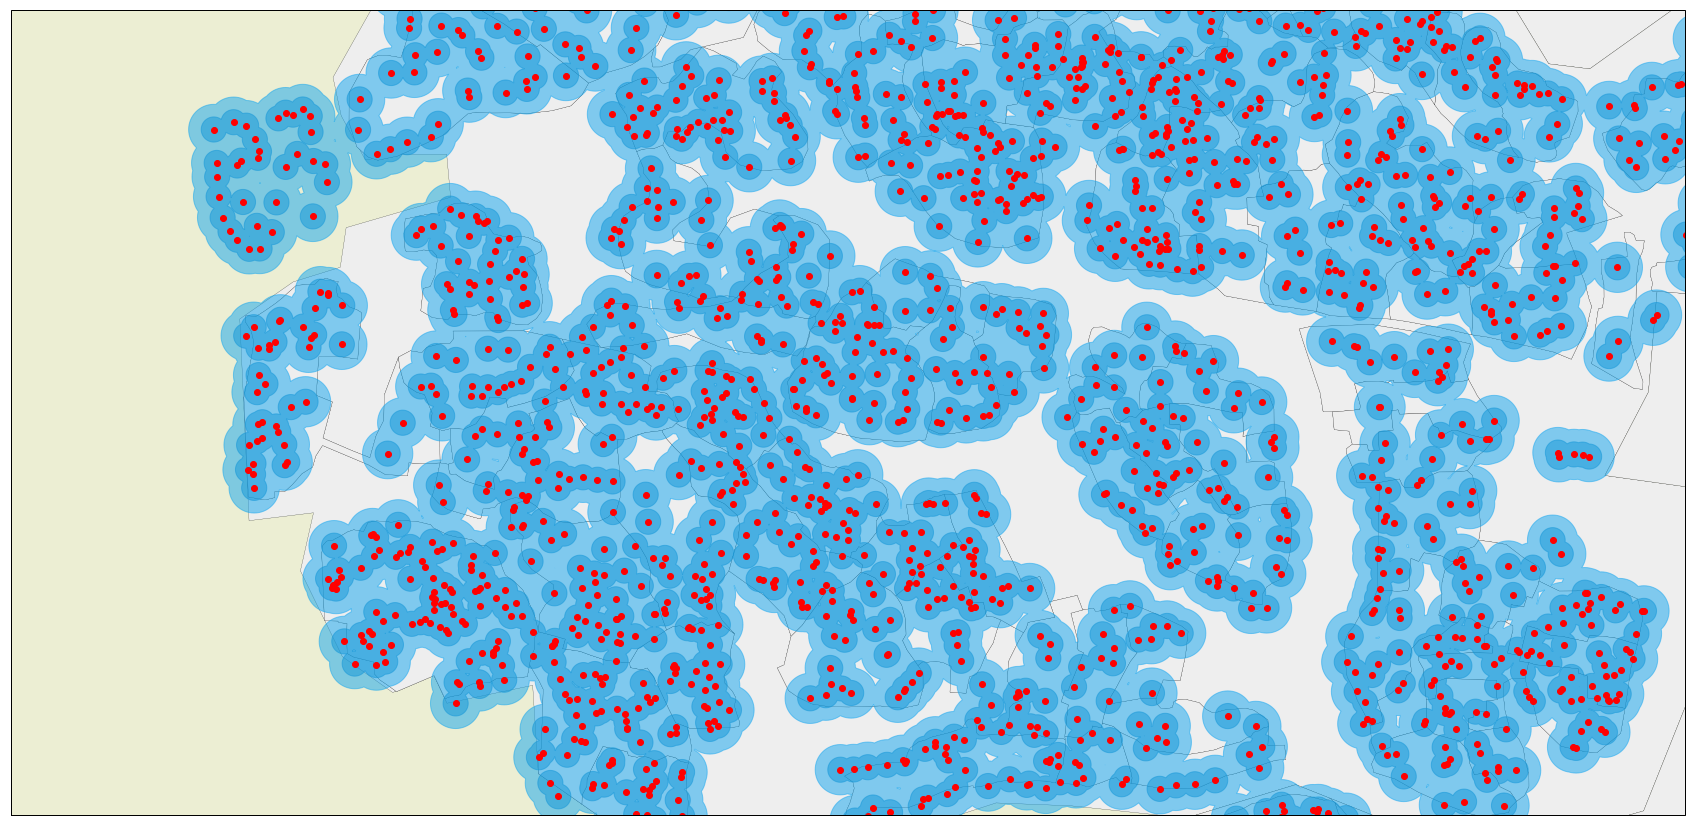

In [7]:
#set the size of the figure
plt.figure(figsize=(30,30))

#plot the axes for a certain projection
ax3 = plt.axes(projection=ccrs.PlateCarree())



###get the Bangladeshi district data from the files###
districts_filename = 'shapefiles/BGD_bnda_adm2_2015'

for district in shpreader.Reader(districts_filename).geometries():

    ax3.add_geometries([district], ccrs.PlateCarree(), facecolor='#eceed3', edgecolor='black', linewidth=0.1)


min_lon = 92.1383
max_lon = 92.1408
min_lat = 21.1570
max_lat = 21.1584

'''
min_lon = 92.1323
max_lon = 92.1577
min_lat = 21.1491
max_lat = 21.1747

'''
min_lon = 92.1347
max_lon = 92.1480
min_lat = 21.1567
max_lat = 21.1631

#crop the picture
road_extent = (min_lon, max_lon, min_lat, max_lat)
ax3.set_extent(road_extent) 

#retrieve the camp outlines
outlines = requests.get(camp_outlines)
outlines_results = outlines.json()

#retrieve the outlines of the subsections within a camp
ssc = requests.get(ssc_all)
ssc_results = ssc.json()

#retrieve all the wash infrastructure data
wash_infra = requests.get(wash)
wash_results = wash_infra.json()


for entry in outlines_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    ax3.add_geometries([shapey], ccrs.PlateCarree(), facecolor='#eeeeee', edgecolor='black', linewidth=0.2)
    
for entry in ssc_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
       
    ax3.add_geometries([shapey], ccrs.PlateCarree(), facecolor='#eeeeee', edgecolor='black', linewidth=0.2)


from descartes import PolygonPatch 
from shapely.ops import cascaded_union

pol_list = []
pol_list2 = []

for entry in wash_results['features']:
    #print(entry['geometry'])
    point = entry['geometry']
    properties = entry['properties']
    type = properties['Str_sub_type']
    
    if type == 'Latrine(s)':

        shapey = shape(point)
        x,y = shapey.xy
        
        #ax2.add_geometries([shapey], ccrs.PlateCarree(), color='white', zorder=4)
        ax3.plot(x,y, 'o', color='red', markersize=6)
        dilated = shapey.buffer(0.0001, cap_style=1)
        dilated2 = shapey.buffer(0.0002, cap_style=1)
        #patch1 = PolygonPatch(dilated, fc='blue', ec='blue', alpha=0.5, zorder=2)
        pol_list.append(dilated)
        pol_list2.append(dilated2)
        #ax3.add_patch(patch1)
        #ax3.add_geometries([dilated], ccrs.PlateCarree(), facecolor='blue', edgecolor='blue', alpha=0.2, linewidth=0.1)


big_shape = cascaded_union(pol_list)  
patch = PolygonPatch(big_shape, fc='#1387c1', ec='#1387c1', alpha=0.5, zorder=2)
ax3.add_patch(patch)

big_shape2 = cascaded_union(pol_list2)
patch2 = PolygonPatch(big_shape2, fc = '#11a5ee', ec = '#11a5ee', alpha=0.5, zorder=2)
ax3.add_patch(patch2)
        
plt.show()

{'type': 'FeatureCollection', 'features': [{'type': 'Feature', 'id': 'relation/8001676', 'properties': {'timestamp': '2018-02-26T19:35:28Z', 'version': '4', 'changeset': '56700604', 'user': 'gnrc69', 'uid': '99872', 'admin_level': '10', 'alt_name': 'Jamtoli-Baggona', 'boundary': 'administrative', 'name': 'Camp 15', 'place': 'neighbourhood', 'source:geometry': 'Humanitarian Data Exchange - data.humdata.org shape2018-02-08', 'source:name': 'Humanitarian Data Exchange - data.humdata.org shape2018-02-08', 'type': 'boundary', 'id': 'relation/8001676'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[92.1440397, 21.1566769], [92.1425378, 21.1567787], [92.1414006, 21.1564035], [92.1404162, 21.1563935], [92.1398003, 21.1562809], [92.1393889, 21.156401], [92.1393916, 21.1566761], [92.138886, 21.1570313], [92.1388496, 21.1577299], [92.1381913, 21.1575954], [92.1380894, 21.157823], [92.1377367, 21.1576767], [92.1373434, 21.1579518], [92.1370018, 21.158641], [92.1371064, 21.1591025], [92.1365914

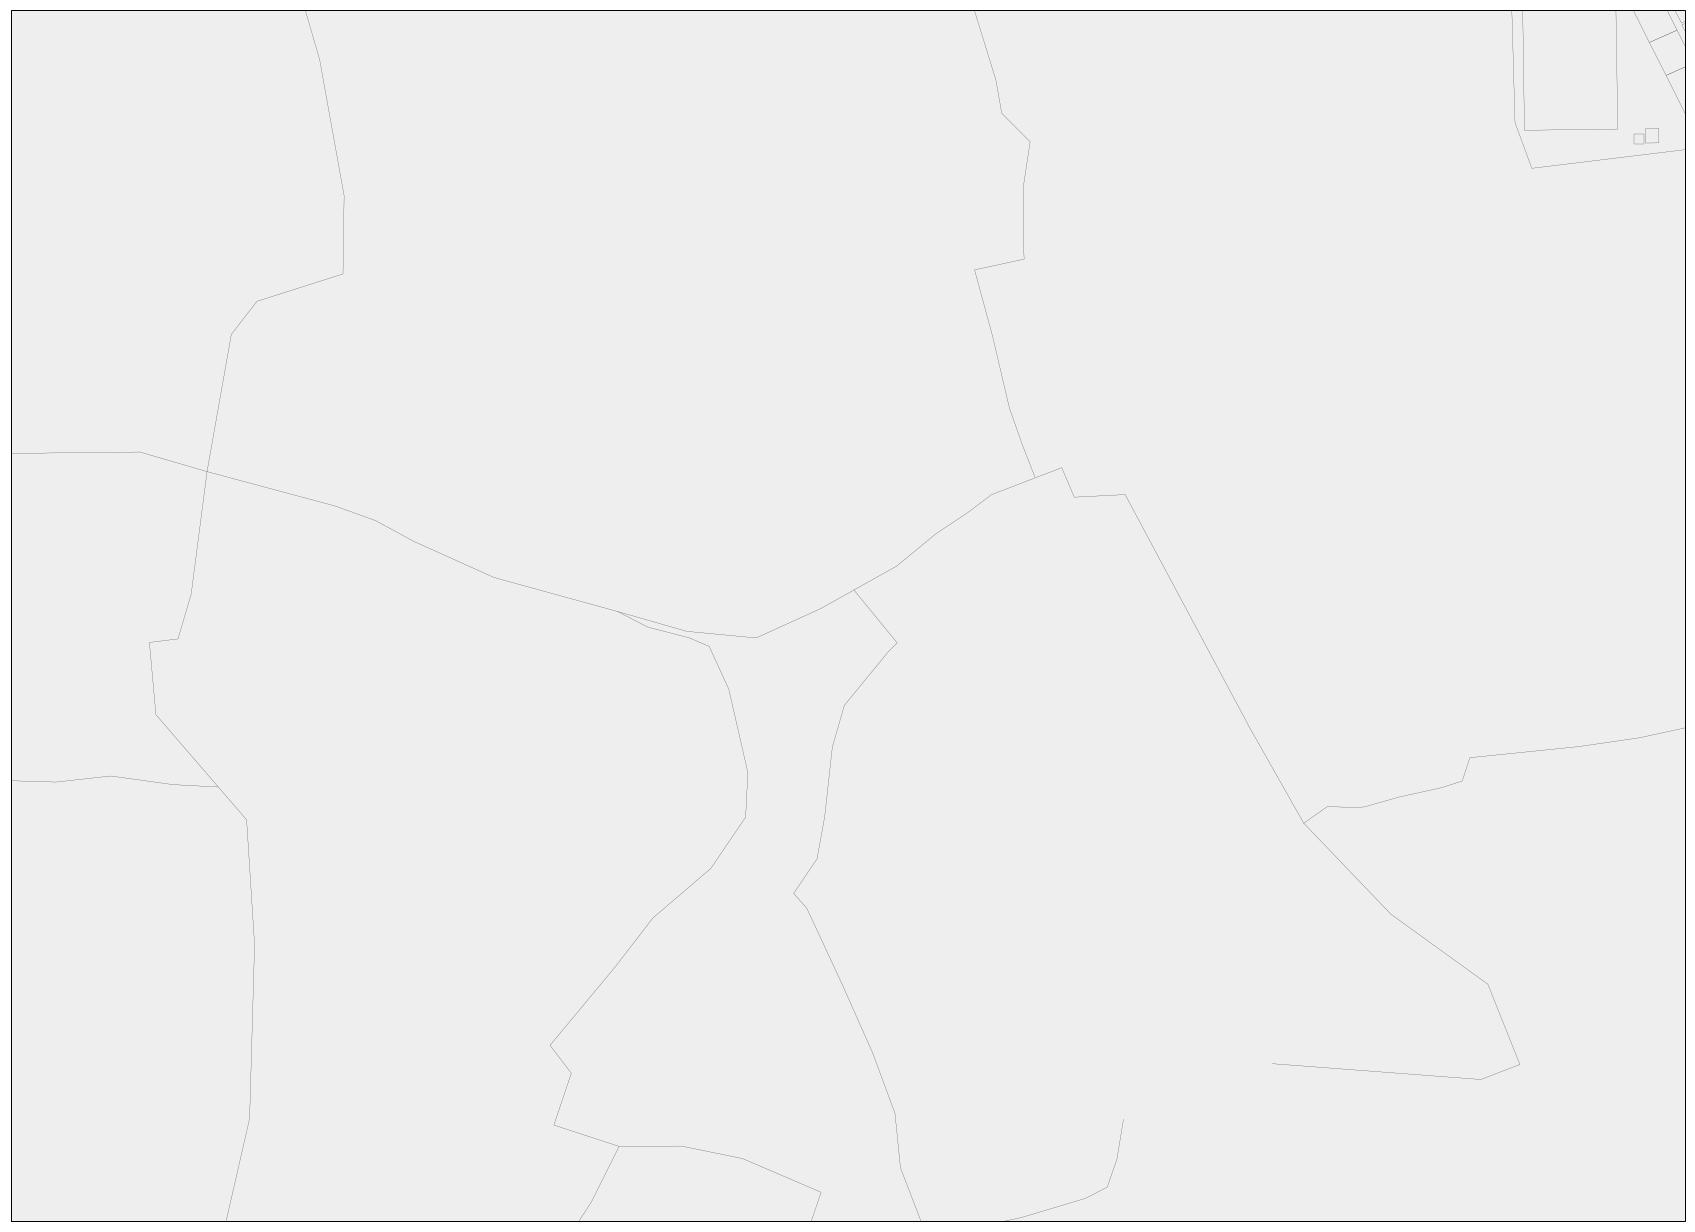

In [14]:
#set the size of the figure
plt.figure(figsize=(30,30))

#plot the axes for a certain projection
ax4 = plt.axes(projection=ccrs.PlateCarree())



###get the Bangladeshi district data from the files###
districts_filename = 'shapefiles/BGD_bnda_adm2_2015'

for district in shpreader.Reader(districts_filename).geometries():

    ax4.add_geometries([district], ccrs.PlateCarree(), facecolor='#eceed3', edgecolor='black', linewidth=0.1)


### crop the map ###
#top left corner: 
#21,1747 92,1323 Graden
#bottom right corner: 
#21,1491 92,1577 Graden
   
 
#This is a zoomed in section
min_lon = 92.13864
max_lon = 92.14070
min_lat = 21.15725
max_lat = 21.15874
'''  

min_lon = 92.1323
max_lon = 92.1577
min_lat = 21.1491
max_lat = 21.1747
'''

#crop the picture
road_extent = (min_lon, max_lon, min_lat, max_lat)
ax4.set_extent(road_extent) 

#retrieve the camp outlines
outlines = requests.get(camp_outlines)
outlines_results = outlines.json()

for entry in outlines_results['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    ax4.add_geometries([shapey], ccrs.PlateCarree(), facecolor='#eeeeee', edgecolor='black', linewidth=0.2)
    
json_data = open('map.geojson')
data = json.load(json_data)
                 
print(data)

for entry in data['features']:
    #print(entry['geometry'])
    subsection = entry['geometry']
    shapey = shape(subsection)
    ax4.add_geometries([shapey], ccrs.PlateCarree(), facecolor='#eeeeee', edgecolor='black', linewidth=0.2)
 